In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import pandas as pd
import numpy as np

def create_3d_surface_plot(df, x_col, y_col, z_col, title='3D Surface Plot', 
                           xlabel='X-axis', ylabel='Y-axis', zlabel='Z-axis', 
                           cmap=cm.coolwarm, figsize=(16, 12), elev=30, azim=45, name="plot", fontsize=14):
    """
    Create a 3D surface plot from three columns in a DataFrame.
    Args:
        df (DataFrame): DataFrame containing the data.
        x_col (str), y_col (str), z_col (str): Column names for the axes.
        title, xlabel, ylabel, zlabel (str, optional): Labels for the plot.
        cmap (Colormap, optional): Colormap for the surface.
        figsize (tuple, optional): Figure size.
        elev, azim (int, optional): Angles for the view.
        name (str): Filename for saving.
        fontsize (int): Font size for text elements.
    """
    x = df[x_col]
    y = df[y_col]
    z = df[z_col]
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xi, yi, zi, cmap=cmap, linewidth=0, antialiased=True)
    ax.set_xlabel(xlabel, fontsize=fontsize, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=fontsize, labelpad=10)
    ax.set_zlabel(zlabel, fontsize=fontsize, labelpad=10)
    plt.title(title, fontsize=fontsize+2)  # Slightly larger font for title

    ax.view_init(elev=elev, azim=azim)
    cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
    cbar.set_label(zlabel, fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)  # Font size for color bar ticks

    plt.savefig(f'./plots/{name}.eps', format='eps')
    plt.savefig(f'./plots/{name}.png', format='png')

# Usage of the function with an example DataFrame
# df = pd.DataFrame(...)  # Define your DataFrame here
# create_3d_surface_plot(df, 'x', 'y', 'z', fontsize=18)  # Call with specific fontsize


In [46]:
mean_df = pd.read_csv("./results/results.csv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


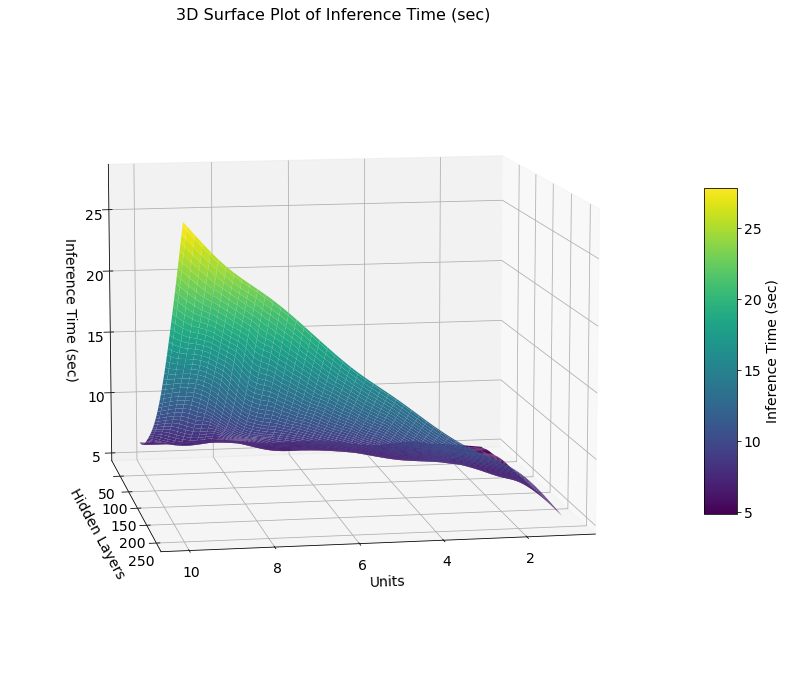

In [47]:
create_3d_surface_plot(df=mean_df, y_col='Units', x_col='Hidden Layers', z_col='Inference_Time_mean', 
                       title='3D Surface Plot of Inference Time (sec)', xlabel='Units', ylabel='Hidden Layers', 
                       zlabel='Inference Time (sec)', cmap=cm.viridis,elev=10,azim=80, name="inference_time")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


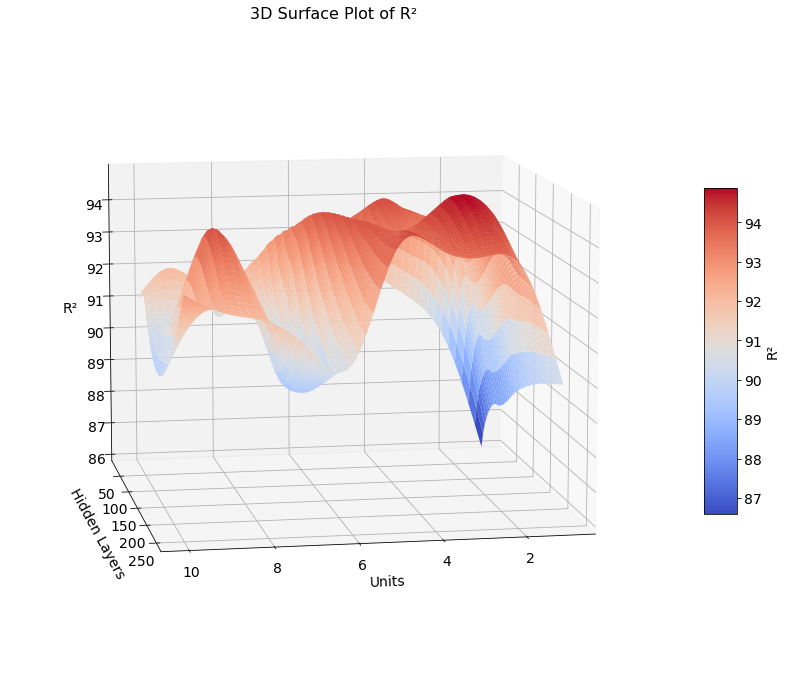

In [48]:
create_3d_surface_plot(df=mean_df, y_col='Units', x_col='Hidden Layers', z_col='R2_mean', 
                       title='3D Surface Plot of R²', xlabel='Units', ylabel='Hidden Layers', 
                       zlabel='R²', cmap=cm.coolwarm, elev=10,azim=80, name="r2")
